# Machine Learning and Statistics Tasks - Winter 2023

## David Higgins - G00411302
___

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

## *Task 1 - Newton's Method for estimating the square root of a number*

Newton's method for estimating the square root of a real number is a specific instance of a more general method of called Newton-Raphson's method for estimating the root of real function. It approximates the function at a given point using the tangent to the function at that point. If a function is real, continuous and differentiable the Newton-Raphson method can be applied. 

The specific case used here is the function $f(x) = x^{2} - a$. By finding the root of this equation, we determine

\begin{align}
x^{2} - a &= 0 \\
x^{2} &= a \\
x &= \sqrt{a}
\end{align}

that is, the square root of $a$.

This is achieved using the formula $x_{n+1} = \frac{1}{2} \left( x_n + \frac{a}{x_n} \right)$, where $x_n$ is the current best approximation of the root (called guess in the code below). $x_{n+1}$ is the improved approximation of the root derived using the formula (called root in the code below). 

The tolerance in the function sqrt(a) is hardcoded in as 0.0001 but can be passed as an argument to the function. The while loop will continue as long as the difference between the previous approximation ($x_{n}$) and the improved approximation ($x_{n+1}$) is greater than the tolerance. As the sequence converges it will reach a point where the difference is less than the tolerance and the while loop terminates. This gives the final approximation of the square root of $a$.

In [2]:
def sqrt(a):              #def sqrt(tol, a): could be used as an alternative to pass in a variable tolerance 
    
    tol = 0.0001
    guess = a
    root = 0.5 * (guess +(a/guess))
    
    while abs(root - guess) > tol:
        guess = root
        root = 0.5 * (guess +(a/guess))
    
    return root

a = float(input("Enter number: "))

print("The square root of", a," is approximately", sqrt(a))
    
    

Enter number: 23
The square root of 23.0  is approximately 4.795831523329245


### References

- https://brilliant.org/wiki/newton-raphson-method/
- https://math.mit.edu/~stevenj/18.335/newton-sqrt.pdf
- https://github.com/dreapadoir/pands-problem-sheet/blob/main/squareroot.py
---

## *Task 2 - Chi-Squared Test* 

The chi-square test is a statistical test used to determine if there is a significant association between two variables. It compares the observed frequencies seen in the data with the expected frequencies that would be expected to be seen in the data if the two variables were independent of each other. 

The formula for the Chi-Squared test statistic is given by
$$
\chi^2 = \sum \frac{(O_{i} - E_{i})^2}{E_{i}}
$$

where $O_{i}$ is the observed data and $E_{i}$ is the expected data. For truly independent variables, the difference between the observed data and the expected data will be small. This will generate a small Chi-Squared test statistic. If there is a link between the variables, the test statistic will be large as the observed data will deviate significantly from the expected data.

The p-value defines the the probability of observing the results (or something more extreme) if the two variables were actually independent. A small p-value suggests that the variables are not independent. A significance level is defined as part of the test, usually 0.05, and if the p-value is less than the significance level, then this indicates that there is a significant association between the two variables.

In [3]:
#Create contingency table as a numpy array
conTable = np.array([[43, 57], [56, 45]])

#Set a p-value (significance level) to evaluate results
sigLevel = 0.05

results = chi2_contingency(conTable)

#print(results)

#Compare the p-value found in the results and the significance level
if results.pvalue < sigLevel:
    print("The p-value ({}) is less than the significance level of {}, therefore there is evidence to support the hypothesis that there is an association between drink preference and biscuit preference.".format(results.pvalue, sigLevel))

else:
    print("The p-value ({}) is greater than the significance level of {}, therefore there is not evidence to support the hypothesis that there is an association between drink preference and biscuit preference.".format(results.pvalue, sigLevel))

The p-value (0.10447218120907394) is greater than the significance level of 0.05, therefore there is not evidence to support the hypothesis that there is an association between drink preference and biscuit preference.


### References

- https://en.wikipedia.org/wiki/Chi-squared_test
- https://www.simplilearn.com/tutorials/statistics-tutorial/chi-square-test
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html
---

## *Task 3 - Penguin dataset t-test* 

The penguin dataset used in this example is a popular dataset frequently used in data analysis and statistics. It is derived from a study conducted by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER (Long Term Ecological Research) program.

The data was collected on an island in the Palmer Archipelago, near the Antarctic Peninsula, and includes information about three species of penguins: Adélie, Chinstrap, and Gentoo. The dataset provides various measurements and characteristics of penguins, including their species, sex, bill length, bill depth, flipper length and body mass.

It has been widely used in data analysis and statistics courses to teach techniques such as hypothesis testing, regression analysis, and data visualization.

The t-test is a statistical method used to compare the means of two groups and determine if there is a significant difference between them. In the context of the penguin dataset, the t-test is used to investigate whether there is a significant difference in the body mass of male and female gentoo penguins. Here's a brief explanation of how the t-test works:

1. Null Hypothesis (H0): The null hypothesis assumes that there is no significant difference between the means of the two groups. In this case, it means that there is no significant difference in body mass between male and female gentoo penguins.

2. Alternative Hypothesis (Ha): The alternative hypothesis is the opposite of the null hypothesis. It suggests that there is a significant difference between the means of the two groups. In this case, it implies that there is a significant difference in body mass between male and female gentoo penguins.

3. T-Test Calculation: The t-test calculates a t-statistic, which measures the difference between the means of the two groups relative to the variability within the groups. A higher t-statistic indicates a larger difference.

4. P-Value: The t-test also calculates a p-value, which represents the probability of observing the observed difference (or more extreme differences) if the null hypothesis were true. A small p-value (typically less than a chosen significance level, e.g., 0.05) suggests strong evidence against the null hypothesis.

5. Interpretation: If the p-value is less than the chosen significance level (e.g., 0.05), we reject the null hypothesis, indicating that there is evidence of a significant difference between the groups. If the p-value is greater than the significance level, we fail to reject the null hypothesis, suggesting no significant difference.

In the code below, we calculate the t-statistic and p-value using the `stats.ttest_ind` function from the scipy library and used a significance level (alpha) of 0.05 to make a decision about whether there is a significant difference in body mass between male and female gentoo penguins based on the p-value.

In [4]:
penguins_data = pd.read_csv("penguins.csv")  # Make sure to specify the correct path to your dataset

#Filter the data for gentoo penguins
gentoo_penguins = penguins_data[penguins_data["species"] == "Gentoo"]

#Separate the data for male and female gentoo penguins
male_penguins = gentoo_penguins[gentoo_penguins["sex"] == "MALE"]
female_penguins = gentoo_penguins[gentoo_penguins["sex"] == "FEMALE"]

#Remove missing values for body mass
male_penguins = male_penguins.dropna(subset=["body_mass_g"])
female_penguins = female_penguins.dropna(subset=["body_mass_g"])

#Perform the t-test
t_statistic, p_value = stats.ttest_ind(male_penguins["body_mass_g"], female_penguins["body_mass_g"])


print("T-Statistic:", t_statistic)
print("P-Value:", p_value) 

#Determine significance
alpha = 0.05 
if p_value < alpha:
    print("There is evidence of a significant difference in body mass between male and female gentoo penguins.")
else:
    print("There is no significant difference in body mass between male and female gentoo penguins.")

T-Statistic: 14.721676481405709
P-Value: 2.133687602018886e-28
There is evidence of a significant difference in body mass between male and female gentoo penguins.


### References

- https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv (visited on 11/11/2023)
- https://statistics.laerd.com/spss-tutorials/independent-t-test-using-spss-statistics.php (visited on 11/11/2023)
- *M140 - Introducting Statistics*, Open University 2007
---

## *Task 4 - Iris data set*

The famous Iris dataset, often used in machine learning and statistics, includes measurements of sepal length and width, and petal length and width for three species of Iris flowers: Iris setosa, Iris versicolor, and Iris virginica.

To assess whether the Iris setosa class is easily separable from the other two classes (versicolor and virginica), we can perform an exploratory data analysis. One common approach is to use scatter plots to visualize the relationships between different pairs of features for each of the three Iris species. By examining these plots, we can determine whether Iris setosa points form a distinct group separate from the other two species.

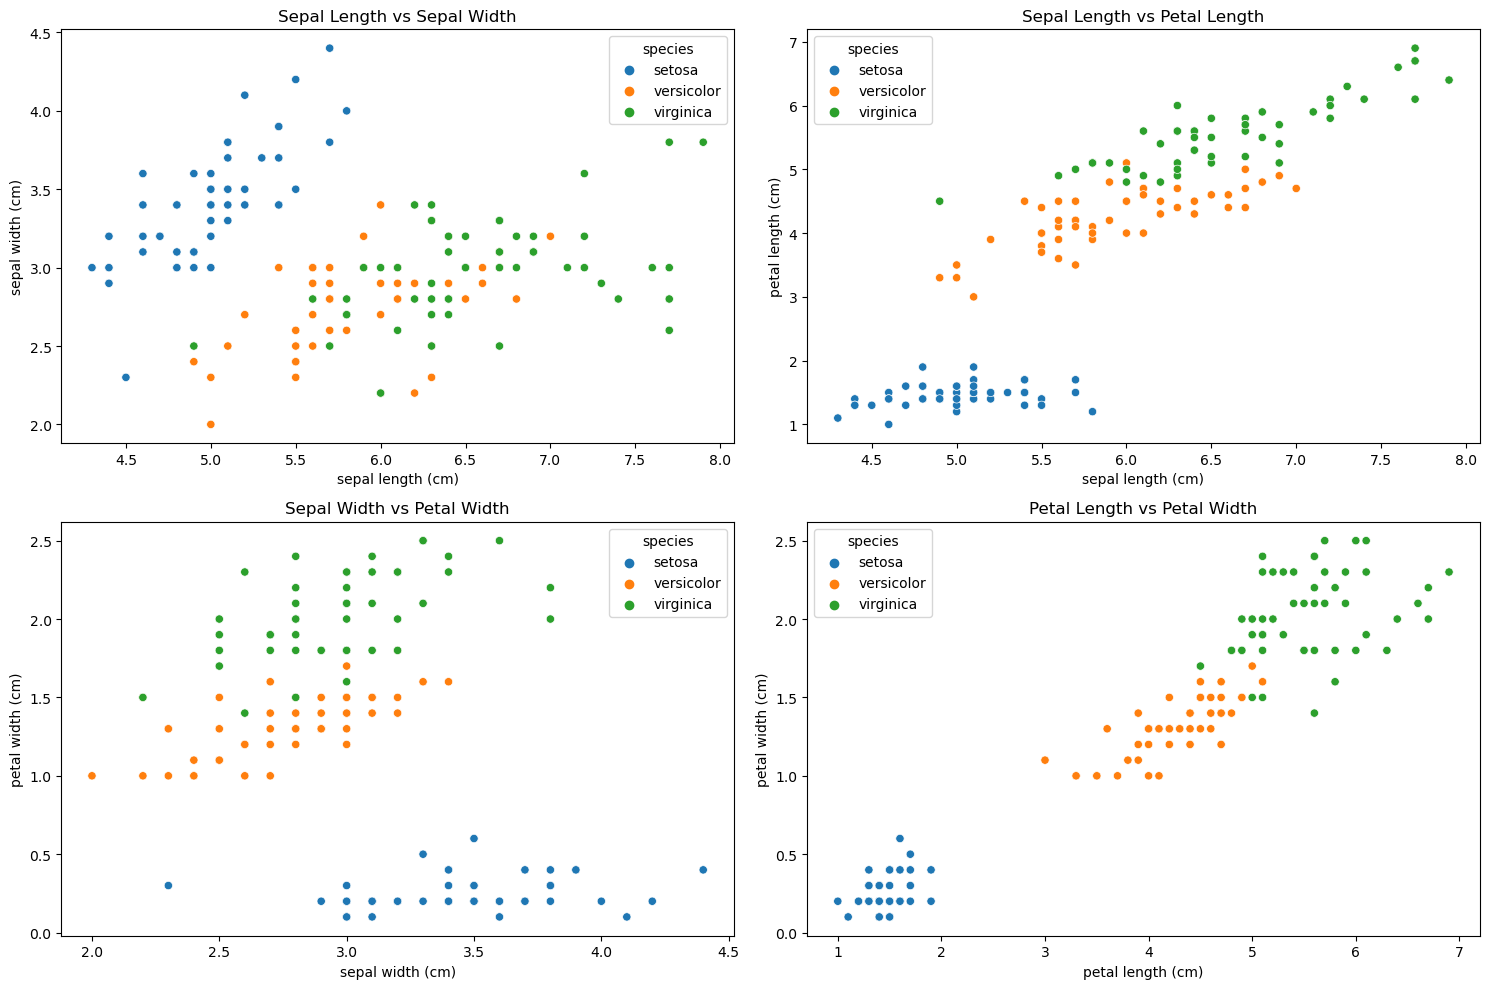

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import pandas as pd

#load the dataset from sklearn
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Plotting scatter plots
plt.figure(figsize=(15, 10))

# Sepal length vs Sepal width
plt.subplot(2, 2, 1)
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='species', data=iris_df)
plt.title('Sepal Length vs Sepal Width')

# Sepal length vs Petal length
plt.subplot(2, 2, 2)
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', hue='species', data=iris_df)
plt.title('Sepal Length vs Petal Length')

# Sepal width vs Petal width
plt.subplot(2, 2, 3)
sns.scatterplot(x='sepal width (cm)', y='petal width (cm)', hue='species', data=iris_df)
plt.title('Sepal Width vs Petal Width')

# Petal length vs Petal width
plt.subplot(2, 2, 4)
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='species', data=iris_df)
plt.title('Petal Length vs Petal Width')

plt.tight_layout()
plt.show()


The scatter plots of the Iris dataset provide a clear visualization of the separability of the Iris setosa species from the other two species, Iris versicolor and Iris virginica:

Sepal Length vs. Sepal Width: Iris setosa appears distinctly separable from the other two species. It has a unique cluster with smaller sepal length and larger sepal width.

Sepal Length vs. Petal Length: Again, Iris setosa shows a clear separation, with shorter sepal lengths and petal lengths compared to the other species.

Sepal Width vs. Petal Width: In this plot, the setosa species is noticeably separated from the other two, particularly in terms of smaller petal width.

Petal Length vs. Petal Width: This plot shows the most distinct separation, with Iris setosa having significantly smaller petal lengths and widths than the other two species.

Based on these visualizations, we can conclude that the Iris setosa species is easily separable from Iris versicolor and Iris virginica in the Iris dataset, particularly when considering petal dimensions.

## *Task 5*

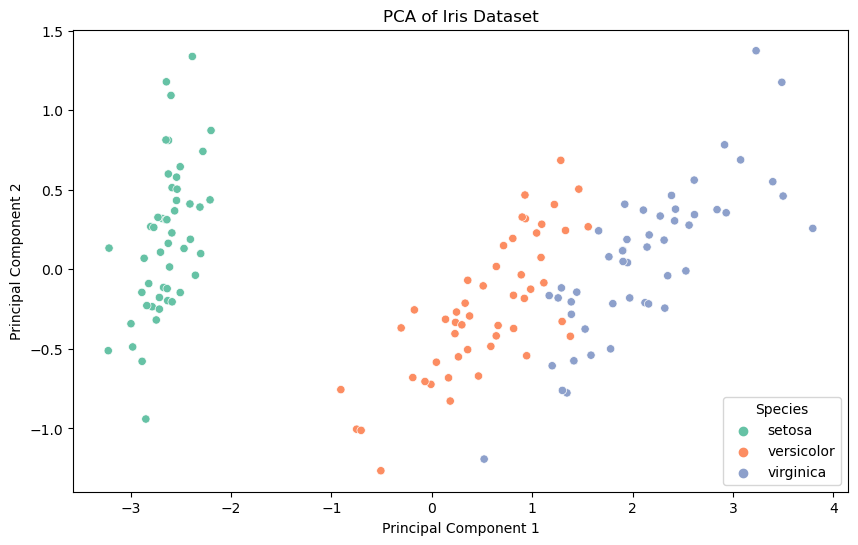

In [6]:
# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_target = iris.target

# Apply Principal Component Analysis
pca = PCA(n_components=2)
principal_components = pca.fit_transform(iris_df)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Species'] = pd.Categorical.from_codes(iris_target, iris.target_names)

# Visualize the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Species', data=pca_df, palette='Set2')
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Species')
plt.show()

Principal Component Analysis (PCA) on the Iris dataset was performed to reduce the dataset's dimensionality from four dimensions (sepal length, sepal width, petal length, petal width) to two dimensions. The purpose of this analysis is to simplify the complexity of the data while retaining as much of the variance (information) as possible. This simplification is particularly useful for visualisation, data compression, and efficiency in machine learning algorithms.

In the PCA results, two principal components were extracted. The scatter plot visualizes the data points in the new two-dimensional space defined by these components. Each point in the plot represents an Iris flower, colored according to its species (setosa, versicolor, virginica). 

The first principal component (PC1) accounts for approximately 92.46% of the total variance in the dataset, while the second principal component (PC2) accounts for about 5.31%. This means that by projecting the data onto these two components, we retain about 97.77% of the total information (variance) contained in the original four dimensions.

From the scatter plot, we observe that the species are fairly well separated along these two principal components, especially the setosa species, which is distinctly separated from the other two. The versicolor and virginica species show some overlap, but are still reasonably distinguishable. This separation indicates that PCA has successfully reduced the dimensions while preserving the characteristics that differentiate the species.

## References